# Training a YoloV3 on Custom Dataset

## Downloading the github repo for YOLOV3

In [ ]:
!git clone https://github.com/sniper0110/YOLOv3.git

Cloning into 'YOLOv3'...
remote: Enumerating objects: 93, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 93 (delta 39), reused 67 (delta 18), pack-reused 0
Unpacking objects: 100% (93/93), done.


## Imports

In [ ]:

import tensorflow as tf
import numpy as np

import os
import shutil
import cv2
import colorsys
import random

## Downloading the data from kaggle

In [ ]:
!mkdir ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download andrewmvd/face-mask-detection

mkdir: cannot create directory ‘/root/.kaggle/’: File exists
 98% 389M/398M [00:10<00:00, 46.1MB/s]
100% 398M/398M [00:10<00:00, 40.6MB/s]


In [ ]:
import zipfile
def unzip_data(filename,f_name):
  zip_ref = zipfile.ZipFile(filename,'r')
  zip_ref.extractall(path=f_name)
  zip_ref.close()

In [ ]:
unzip_data('face-mask-detection.zip','dataset')

In [ ]:
!mkdir -p /content/images/train

In [ ]:
!mkdir /content/images/test

In [ ]:
import xml.etree.ElementTree as ET
import os
anot_file = open('./anots.txt','w')
for f in os.scandir('./dataset/annotations'):
  xml = ET.parse(f.path)
  root = xml.getroot()
  folder = root.find('folder').text
  filename = root.find('filename').text
  wrt_str = ""
  wrt_str += f"{folder}/{filename} "
  obj_lst = root.findall('object')
  for i in obj_lst:
    name = i.find('name').text
    cls = 0 if name=='with_mask' else 1
    bndbox = i.find('bndbox')
    xmin = bndbox[0].text
    ymin = bndbox[1].text
    xmax = bndbox[2].text
    ymax = bndbox[3].text
    wrt_str += f"{xmin},{ymin},{xmax},{ymax},{cls} "
  wrt_str += '\n'
  anot_file.write(wrt_str)

anot_file.close()


In [ ]:
anot_file_r = open('./anots.txt','r')
l = anot_file_r.readlines()
for i in l:
  print(i)

anot_file_r.close()

images/maksssksksss412.png 190,100,267,186,0 317,198,391,274,0 

images/maksssksksss80.png 214,54,291,132,0 

images/maksssksksss781.png 78,199,191,333,0 

images/maksssksksss672.png 159,110,193,148,0 214,168,246,205,0 29,150,55,183,0 341,118,376,156,0 240,143,277,186,1 51,221,96,263,1 1,50,27,78,1 133,47,159,76,1 354,266,397,300,1 

images/maksssksksss814.png 114,262,207,379,0 

images/maksssksksss165.png 15,111,114,219,0 324,135,410,238,0 

images/maksssksksss494.png 91,80,163,158,0 

images/maksssksksss38.png 194,102,230,139,0 252,116,284,149,1 

images/maksssksksss250.png 180,64,222,107,0 85,65,118,103,1 135,36,154,64,1 26,42,59,85,1 341,32,385,85,1 

images/maksssksksss393.png 44,88,161,206,0 241,261,365,390,0 

images/maksssksksss818.png 122,226,233,374,1 

images/maksssksksss465.png 231,42,297,128,0 

images/maksssksksss418.png 340,146,353,159,0 49,158,58,168,0 

images/maksssksksss830.png 167,77,220,133,1 

images/maksssksksss374.png 183,21,215,51,0 28,91,52,113,0 191,143,225,1

In [ ]:
!rm -rf images/train/*

In [ ]:
import shutil
folder = './dataset/'
dest_folder_train = './images/train/'
dest_folder_test = './images/test/'
anot_file_r = open('./anots.txt','r')
lines = anot_file_r.readlines()
train_anot_f = open('./images/train/train_anot.txt','w')
test_anot_f = open('./images/test/test_anot.txt','w')
for i,line in enumerate(lines):
  x = line.split()
  fname = x[0].split('/')[1]
  src = folder+x[0]
  if i<=758:
    dest = dest_folder_train+fname
    x[0] = dest[2:]
    wrt_str = ' '.join(x) + '\n'
    train_anot_f.write(wrt_str)
    print(src,dest)
    shutil.copyfile(src,dest)
  else:
    dest = dest_folder_test+fname
    x[0] = dest[2:]
    wrt_str = ' '.join(x) + '\n'
    test_anot_f.write(wrt_str)
    print(src,dest)
    shutil.copyfile(src,dest)

./dataset/images/maksssksksss412.png ./images/train/maksssksksss412.png
./dataset/images/maksssksksss80.png ./images/train/maksssksksss80.png
./dataset/images/maksssksksss781.png ./images/train/maksssksksss781.png
./dataset/images/maksssksksss672.png ./images/train/maksssksksss672.png
./dataset/images/maksssksksss814.png ./images/train/maksssksksss814.png
./dataset/images/maksssksksss165.png ./images/train/maksssksksss165.png
./dataset/images/maksssksksss494.png ./images/train/maksssksksss494.png
./dataset/images/maksssksksss38.png ./images/train/maksssksksss38.png
./dataset/images/maksssksksss250.png ./images/train/maksssksksss250.png
./dataset/images/maksssksksss393.png ./images/train/maksssksksss393.png
./dataset/images/maksssksksss818.png ./images/train/maksssksksss818.png
./dataset/images/maksssksksss465.png ./images/train/maksssksksss465.png
./dataset/images/maksssksksss418.png ./images/train/maksssksksss418.png
./dataset/images/maksssksksss830.png ./images/train/maksssksksss830.

##CONTENTS OF CONFIG.PY

In [ ]:
from easydict import EasyDict as edict

# Setting the cfg
cfg = edict()

# Setting the YOLO parameters
cfg.YOLO = edict()
cfg.YOLO.CLASSES = './YOLOv3/data/classes/mask_or_no_mask.names'
cfg.YOLO.ANCHORS = './YOLOv3/data/anchors/basline_anchors.txt'
cfg.YOLO.STRIDES = [8,16,32]
cfg.YOLO.ANCHOR_PER_SCALE = 3
cfg.YOLO.IOU_LOSS_THRESH = 0.5

# Setting the TRAIN parameters
cfg.TRAIN = edict()
cfg.TRAIN.INPUT_SIZE = 224
cfg.TRAIN.ANNOT_PATH = './images/train/train_anot.txt'
cfg.TRAIN.BATCH_SIZE = 2
cfg.TRAIN.DATA_AUG = False
cfg.TRAIN.LR_INIT = 1e-5
cfg.TRAIN.LR_END = 1e-6
cfg.TRAIN.WARMUP_EPOCHS = 2
cfg.TRAIN.EPOCHS = 15

cfg.TEST = edict()
cfg.TEST.INPUT_SIZE = 224
cfg.TEST.ANNOT_PATH = './images/test/test_anot.txt'
cfg.TEST.BATCH_SIZE = 1
cfg.TEST.DATA_AUG = False
cfg.TEST.DETECTED_IMAGE_PATH = '/content/YOLOv3/data/detection'
cfg.TEST.SCORE_THRESHOLD = 0.3
cfg.TEST.IOU_THRESHOLD = 0.5



In [ ]:
device = tf.test.gpu_device_name()

##CONTENTS OF UTILS.PY

In [ ]:
def load_weights(model,weight_file):

  wf = open(weight_file,'rb')
  major, minor, revision, seen, _ = np.fromfile(wf,dtype=np.int32,count=5)

  j = 0
  for i in range(75):
    conv_layer_name = f'conv_2d_{i}' if i>0 else 'conv_2d'
    bn_layer_name = f'batch_normalization_{j}'if j>0 else 'batch_normalization'

    conv_layer = model.get_layer(conv_layer_name)
    filters = conv_layer.filters
    k_size = conv_layer.kernel_size[0]
    in_dim = conv_layer.input_shape[-1]

    if i not in [58,66,74]:
      bn_weights = np.fromfile(wf,dtype=np.float32,count=4*filters)
      bn_weights = bn_weights.reshape((4,filters))[[1,0,2,3]]
      bn_layer = model.get_layer(bn_layer_name)

      j+=1

    else:
      conv_bias = np.fromfile(wf,dtype=np.float32,count=filters)

    conv_shape = (filters,in_dim,k_size,k_size)
    conv_weights = np.fromfile(wf,dtype=np.float32,count = np.product(conv_shape))
    conv_weights = conv_weights.reshape(conv_shape).transpose([2,3,1,0])

    if i not in [58,55,74]:
      conv_layer.set_weights([conv_weights])
      bn_layer.set_weights([bn_weights])

    else:
      conv_layer.set_weights([conv_weights,conv_bias])

  assert len(wf.read()) == 0, 'failed to read all data'
  wf.close()

def read_class_names(class_file_name):
  names = {}
  with open(class_file_name,'r') as data:
      for ID,name in enumerate(data):
        names[ID] = name

  return names


def image_preprocess(image,target_size,gt_boxes=None):
  ih,iw = target_size
  h,w,_ = image.shape

  scale = min(iw/w,ih/h)
  nw, nh = int(scale*w),int(scale*h)
  image_resized = cv2.resize(image,(nw,nh))
  image_padded = np.full(shape=[ih,iw,3],fill_value=128.0)
  dw,dh = (iw-nw) // 2,(ih-nh) // 2
  image_padded[dh:nh+dh,dw:nw+dw,:] = image_resized
  image_padded /= 255.

  if gt_boxes is None:
    return image_padded

  else:
    gt_boxes[:,[0,2]] = gt_boxes[:,[0,2]] * scale + dw
    gt_boxes[:,[1,3]] = gt_boxes[:,[1,3]] * scale + dh
    return image_padded,gt_boxes

def get_anchors(anc_path):
  with open(anc_path) as f:
    anchors = f.readline()
  anchors = np.array(anchors.split(','),dtype=np.float32)
  return anchors.reshape(3,3,2)

def draw_bbox(image, bboxes, classes=read_class_names(cfg.YOLO.CLASSES), show_label=True):

  num_classes = len(classes)
  image_h,image_w,_ = image.shape
  hsv_tuples = [(1.0 * x/num_classes,1.0,1.0) for x in range(num_classes)]
  colors = list(map(lambda x: colorsys.hsv_to_rgb(*x),hsv_tuples))
  colors = list(map(lambda x: (int(x[0]*255),int(x[1]*255),int(x[2]*255)),colors))

  random.seed(0)
  random.shuffle(colors)
  random.seed(None)

  for i,bbox in enumerate(bboxes):
    coor = np.array(bbox[:4],dtype=np.int32)
    fontscale = 0.5
    score = bbox[4]
    class_ind = int(bbox[5])
    bbox_color = colors[class_ind]
    bbox_thick = int(0.6 * (image_h+image_w)/600)
    c1,c2 = (coor[0],coor[1]),(coor[2],coor[3])
    cv2.rectangle(image,c1,c2,bbox_color,bbox_thick)

    if show_label:
      bbox_mess = f"{classes[class_ind]}: {score:.2f}"
      t_size = cv2.getTextSize(bbox_mess,0,fontscale,thickness=bbox_thick//2)[0]
      cv2.rectangle(image,c1,(c1[0] - t_size[0],c1[1] + t_size[1] - 3),bbox_color,-1)
      cv2.putText(image,bbox_mess,(c1[0],c1[1] - 2), cv2.FONT_HERSHEY_SIMPLEX,
                  fontscale,(0,0,0),bbox_thick//2,lineType=cv2.LINE_AA)
  return image

def bboxes_iou(boxes1,boxes2):

  boxes1 = np.array(boxes1)
  boxes2 = np.array(boxes2)

  boxes1_area = (boxes1[...,2] - boxes1[...,0]) * (boxes1[...,3] - boxes1[...,1])
  boxes2_area = (boxes2[...,2] - boxes2[...,0]) * (boxes2[...,3] - boxes2[...,1])

  left_up = np.maximum(boxes1[...,:2],boxes2[...,:2])
  right_down = np.minimum(boxes2[...,2:],boxes2[...,2:])

  inter_section = np.maximum(right_down-left_up,0.0)
  inter_area = inter_section[...,0] * inter_section[...,1]
  union_area = boxes1_area + boxes2_area - inter_area
  ious = np.maximum(1.0 * inter_area/union_area,np.finfo(np.float32).eps)

  return ious

def nms(bboxes,iou_threshold,sigma=0.3,method='nms'):
  classes_in_img = list(set(bboxes[:,5]))
  best_bboxes = []

  for cls in classes_in_img:
    cls_mask = (bboxes[:,5] == cls)
    cls_bboxes = bboxes[cls_mask]

    while len(cls_bboxes) > 0:
      max_ind = np.argmax(cls_bboxes[:,4])
      best_bbox = cls_bboxes[max_ind]
      best_bboxes.append(best_bbox)

      cls_bboxes = np.concatenate([cls_bboxes[:,max_ind],cls_bboxes[max_ind + 1:]])
      iou = bboxes_iou(best_bbox[np.newaxis,:4],cls_bboxes[:,:4])
      weight = np.ones((len(iou),),dtype=np.float32)

      assert method in ['nms','soft-nms']

      if method=='nms':
        iou_mask = iou>iou_threshold
        weight[iou_mask] = 0.0

      if method=='soft-nms':
        weight = np.exp(-(1.0*iou**2/sigma))


      cls_bboxes[:,4] = cls_bboxes[:,4] * weight
      score_mask = cls_bboxes[:,4] > 0.
      cls_bboxes = cls_bboxes[score_mask]

  return best_bboxes

def postprocess_boxes(pred_bbox,org_img_shape,input_size,score_threshold):

  valid_scale = [0,np.inf]
  pred_bbox = np.array(pred_bbox)

  pred_xywh = pred_bbox[:,0:4]
  pred_conf = pred_bbox[:,4]
  pred_prob = pred_bbox[:,5:]

  # Converting x,y,w,h --> xmin,ymin,xmax,ymax
  pred_coor = np.concatenate([pred_xywh[:,:2] - pred_xywh[:,2:] * 0.5,
                              pred_xywh[:,:2] + pred_xywh[:,2:] * 0.5], axis=-1)

  # Converting xmin, ymin, xmax, ymax --> xmin_org,ymin_org,xmax_org,ymax_org
  org_h,org_w = org_img_shape
  resize_ratio = min(input_size/org_w,input_size/org_h)

  dw = (input_size - resize_ratio*org_w) / 2
  dh = (input_size - resize_ratio*org_h) /2

  pred_coor[:,0::2] = 1.0 * (pred_coor[:,0::2] - dw) / resize_ratio
  pred_coor[:,1::2] = 1.0 * (pred_coor[:,1::2] - dw) / resize_ratio

  pred_coor = np.concatenate([np.maximum(pred_coor[:,:2],[0.,0.]),
                              np.maximum(pred_coor[:,2:],[org_w - 1, org_h - 1])], axis=-1)

  invalid_mask = np.logical_or((pred_coor[:,0] > pred_coor[:,2]), (pred_coor[:,1] > pred_coor[:,3]))

  pred_coor[invalid_mask] = 0

  bboxes_scale = np.sqrt(np.multiply.reduce(pred_coor[:,2:4] - pred_coor[:,0:2],axis = -1))
  scale_mask = np.logical_and((valid_scale[0]<bboxes_scale),(bboxes_scale<valid_scale[1]))

  classes = np.argmax(pred_prob,axis=-1)
  scores = pred_conf * pred_prob[np.arange(len(pred_coor)),classes]
  score_mask = scores > score_threshold
  mask = np.logical_and(scale_mask,score_mask)
  coors, scores,classes = pred_coor[mask], scores[mask], classes[mask]

  return np.concatenate([coors,scores[:,np.newaxis],classes[:,np.newaxis]],axis=-1)


## CONTENTS OF DATASET.PY

In [ ]:
class Dataset:
  "Implement the dataset here"
  def __init__(self,dataset_type,device):
    self.device = device
    self.annot_path = cfg.TRAIN.ANNOT_PATH if dataset_type == 'train' else cfg.TEST.ANNOT_PATH
    self.input_sizes = cfg.TRAIN.INPUT_SIZE if dataset_type == 'train' else cfg.TEST.INPUT_SIZE
    self.batch_size = cfg.TRAIN.BATCH_SIZE if dataset_type == 'train' else cfg.TEST.BATCH_SIZE
    self.data_aug = cfg.TRAIN.DATA_AUG if dataset_type == 'train' else cfg.TEST.DATA_AUG

    self.train_input_size = cfg.TRAIN.INPUT_SIZE
    self.strides = np.array(cfg.YOLO.STRIDES)
    self.classes = read_class_names(cfg.YOLO.CLASSES)
    self.num_classes = len(self.classes)
    self.anchors = np.array(get_anchors(cfg.YOLO.ANCHORS))
    self.anchor_per_scale = cfg.YOLO.ANCHOR_PER_SCALE
    self.max_bbox_per_scale = 150

    self.annotation = self.load_annotations()
    self.num_samples = len(self.annotation)
    self.num_batches = int(np.ceil(self.num_samples/self.batch_size))
    self.batch_count = 0

  def load_annotations(self):
    with open(self.annot_path,'r') as f:
      txt = f.readlines()
      annotations = [line.strip() for line in txt if len(line.strip().split()[1:])!=0]
    np.random.shuffle(annotations)
    return annotations

  def parse_annotation(self,annotation):
    line = annotation.split()
    image_path = line[0]
    if not os.path.exists(image_path):
      raise KeyError(f"{image_path} does not exist....")

    image = cv2.imread(image_path)
    bboxes = np.array([list(map(int,box.split(','))) for box in line[1:]])

    # if self.data_aug:
    #   image,bboxes = self.random_horizontal_flip(np.copy(image),np.copy(bboxes))
    #   image,bboxes = self.random_crop(np.copy(image),np.copy(bboxes))
    #   image,bboxes = self.random_transalate(np.copy(image),np.copy(bboxes))

    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image,bboxes = image_preprocess(np.copy(image),[self.train_input_size,self.train_input_size],np.copy(bboxes))
    return image,bboxes

  def bbox_iou(self,boxes1,boxes2):
    boxes1 = np.array(boxes1)
    boxes2 = np.array(boxes2)

    boxes1_area = boxes1[...,2] * boxes1[...,3]
    boxes2_area = boxes2[...,2] * boxes2[...,3]

    boxes1 = np.concatenate([boxes1[...,:2] - boxes1[...,2:] * 0.5,
                             boxes1[...,:2] + boxes1[...,2:] * 0.5],axis=-1)
    boxes2 = np.concatenate([boxes2[...,:2] - boxes2[...,2:] * 0.5,
                             boxes2[...,:2] + boxes2[...,2:] * 0.5],axis=-1)

    left_up = np.maximum(boxes1[...,:2],boxes2[...,:2])
    right_down = np.minimum(boxes1[...,2:],boxes2[...,2:])

    inter_section = np.maximum(right_down - left_up, 0.0)
    inter_area = inter_section[...,0] * inter_section[...,1]
    union_area = boxes1_area + boxes2_area - inter_area

    return inter_area/union_area



  def preprocess_true_boxes(self,bboxes):

    label = [np.zeros((self.train_output_size[i],self.train_output_size[i],self.anchor_per_scale,
                       5+self.num_classes)) for i in range(3)]
    bboxes_xywh = [np.zeros((self.max_bbox_per_scale,4)) for _ in range(3)]
    bbox_count = np.zeros((3,))

    for bbox in bboxes:
      bbox_coor = bbox[:4]
      bbox_class_ind = bbox[4]

      onehot = np.zeros(self.num_classes,dtype=np.float32)
      onehot[bbox_class_ind] = 1.0
      uniform_distribution = np.full(self.num_classes,1/self.num_classes)
      deta = 0.01
      smooth_onehot = onehot * (1 - deta) + deta * uniform_distribution


      bbox_xywh = np.concatenate([(bbox_coor[2:] + bbox_coor[:2]) * 0.5,bbox_coor[2:] - bbox_coor[:2]],axis=-1)
      bbox_xywh_scaled = 1.0 * bbox_xywh[np.newaxis,:] / self.strides[:,np.newaxis]

      iou = []
      exist_positive = False

      for i in range(3):
        anchors_xywh = np.zeros((self.anchor_per_scale,4))
        anchors_xywh[:, 0:2] = np.floor(bbox_xywh_scaled[i,0:2]).astype(np.int32) + 0.5
        anchors_xywh[:, 2:4] = self.anchors[i]
        iou_scale = self.bbox_iou(bbox_xywh_scaled[i][np.newaxis,:],anchors_xywh)
        iou.append(iou_scale)
        iou_mask = iou_scale>0.5

        if np.any(iou_mask):
          xind,yind = np.floor(bbox_xywh_scaled[i,0:2]).astype(np.int32)

          label[i][yind,xind,iou_mask,:] = 0
          label[i][yind,xind,iou_mask,0:4] = bbox_xywh
          label[i][yind,xind,iou_mask,4:5] = 1.0
          label[i][yind,xind,iou_mask,5:] = smooth_onehot

          bbox_ind = int(bbox_count[i] % self.max_bbox_per_scale)
          bboxes_xywh[i][bbox_ind, :4] = bbox_xywh
          bbox_count[i] += 1

          exist_positive = True

      if not exist_positive:
        best_anchor_ind = np.argmax(np.array(iou).reshape(-1),axis=-1)
        best_detect = int(best_anchor_ind / self.anchor_per_scale)
        best_anchor = int(best_anchor_ind % self.anchor_per_scale)
        xind, yind = np.floor(bbox_xywh_scaled[best_detect,0:2]).astype(np.int32)

        label[best_detect][yind,xind,best_anchor,:] = 0
        label[best_detect][yind,xind,best_anchor,0:4] = bbox_xywh
        label[best_detect][yind,xind,best_anchor,4:5] = 1.0
        label[best_detect][yind,xind,best_anchor,5:] = smooth_onehot

        bbox_ind = int(bbox_count[best_detect] % self.max_bbox_per_scale)
        bboxes_xywh[best_detect][bbox_ind,:4] = bbox_xywh
        bbox_count[best_detect] += 1

    label_sbbox, label_mbbox, label_lbbox = label
    sbboxes, mbboxes, lbboxes = bboxes_xywh

    return label_sbbox, label_mbbox, label_lbbox, sbboxes, mbboxes, lbboxes


  def __iter__(self):
    return self

  def __len__(self):
    return self.num_batches

  def __next__(self):

    with tf.device(device):

      self.train_output_size = self.train_input_size // self.strides

      batch_image = np.zeros((self.batch_size,self.train_input_size,self.train_input_size,3),dtype=np.float32)
      batch_label_sbbox = np.zeros((self.batch_size,self.train_output_size[0],self.train_output_size[0],
                                    self.anchor_per_scale,5+self.num_classes),dtype=np.float32)
      batch_label_mbbox = np.zeros((self.batch_size,self.train_output_size[1],self.train_output_size[1],
                                    self.anchor_per_scale,5+self.num_classes),dtype=np.float32)
      batch_label_lbbox = np.zeros((self.batch_size,self.train_output_size[2],self.train_output_size[2],
                                    self.anchor_per_scale,5+self.num_classes),dtype=np.float32)

      batch_sbboxes = np.zeros((self.batch_size,self.max_bbox_per_scale,4),dtype=np.float32)
      batch_mbboxes = np.zeros((self.batch_size,self.max_bbox_per_scale,4),dtype=np.float32)
      batch_lbboxes = np.zeros((self.batch_size,self.max_bbox_per_scale,4),dtype=np.float32)

      num = 0
      if self.batch_count<self.num_batches:
        while num<self.batch_size:
          index = self.batch_count * self.batch_size + num
          if index >= self.num_samples: index -= self.num_samples
          annotation = self.annotation[index]
          image, bboxes = self.parse_annotation(annotation)
          label_sbbox,label_mbbox,label_lbbox,sbboxes,mbboxes,lbboxes = self.preprocess_true_boxes(bboxes)

          batch_image[num,:,:,:] = image
          batch_label_sbbox[num,:,:,:,:] = label_sbbox
          batch_label_mbbox[num,:,:,:,:] = label_mbbox
          batch_label_lbbox[num,:,:,:,:] = label_lbbox

          batch_sbboxes[num,:,:] = sbboxes
          batch_mbboxes[num,:,:] = mbboxes
          batch_lbboxes[num,:,:] = lbboxes
          num+=1

        self.batch_count +=1
        batch_smaller_target = batch_label_sbbox,batch_sbboxes
        batch_medium_target = batch_label_mbbox,batch_mbboxes
        batch_larger_target = batch_label_lbbox,batch_lbboxes

        return batch_image, (batch_smaller_target,batch_medium_target,batch_larger_target)

      else:
        self.batch_count = 0
        np.random.shuffle(self.annotation)
        raise StopIteration




##CONTENTS OF COMMON.PY

In [ ]:
class BatchNormalization(tf.keras.layers.BatchNormalization):

  def call(self,x,training=False):
    if not training:
      training = tf.constant(False)

    training = tf.logical_and(training,self.trainable)
    return super().call(x,training)

def convolutional(input_layer,filter_shape,downsample=False,activate=True,bn=True):
  if downsample:
    input_layer = tf.keras.layers.ZeroPadding2D(((1,0),(1,0)))(input_layer)
    padding = 'valid'
    strides = 2

  else:
    strides = 1
    padding = 'same'

  conv = tf.keras.layers.Conv2D(filters = filter_shape[-1], kernel_size = filter_shape[0], strides = strides,padding = padding,
                               use_bias = not bn, kernel_regularizer=tf.keras.regularizers.l2(0.0005),
                               kernel_initializer = tf.random_normal_initializer(stddev=0.01),
                               bias_initializer = tf.constant_initializer(0.))(input_layer)

  if bn: conv = BatchNormalization()(conv)
  if activate == True: conv = tf.nn.leaky_relu(conv,alpha=0.1)

  return conv

def residual_block(input_layer,input_channel,filter_num1,filter_num2):
  short_cut = input_layer
  conv = convolutional(input_layer,filter_shape=(1,1,input_channel,filter_num1))
  conv = convolutional(conv,filter_shape=(3,3,filter_num1,filter_num2))

  residual_output = short_cut + conv
  return residual_output

def upsample(input_layer):
  return tf.image.resize(input_layer,(input_layer.shape[1] * 2, input_layer.shape[2] * 2),method='nearest')


## CONTENTS OF BACKBONE.PY

In [ ]:
def darknet53(input_data):
  input_data = convolutional(input_data,(3,3,3,32))
  input_data = convolutional(input_data,(3,3,32,64),downsample=True)

  for i in range(1):
    input_data = residual_block(input_data,64,32,64)

  input_data = convolutional(input_data,(3,3,64,128),downsample=True)

  for i in range(2):
    input_data = residual_block(input_data,128,64,128)

  input_data = convolutional(input_data,(3,3,128,256),downsample=True)

  for i in range(8):
    input_data = residual_block(input_data,256,128,256)

  route_1 = input_data

  input_data = convolutional(input_data,(3,3,256,512),downsample=True)

  for i in range(8):
    input_data = residual_block(input_data,512,256,512)

  route_2 = input_data
  input_data = convolutional(input_data,(3,3,512,1024),downsample=True)

  for i in range(4):
    input_data = residual_block(input_data,1024,512,1024)

  return route_1,route_2,input_data




## CONTENTS OF YOLOV3.PY

In [ ]:
NUM_CLASSES = len(read_class_names(cfg.YOLO.CLASSES))
ANCHORS = get_anchors(cfg.YOLO.ANCHORS)
STRIDES = np.array(cfg.YOLO.STRIDES)
IOU_LOSS_THRESH = cfg.YOLO.IOU_LOSS_THRESH

def YOLOv3(input_layer):
  route_1,route_2,conv = darknet53(input_layer)

  conv = convolutional(conv,(1,1,1024,512))
  conv = convolutional(conv,(3,3,512,1024))
  conv = convolutional(conv,(1,1,1024,512))
  conv = convolutional(conv,(3,3,512,1024))
  conv = convolutional(conv,(1,1,1024,512))
  conv = convolutional(conv,(3,3,512,1024))

  conv_lobj_branch = convolutional(conv,(3,3,512,1024))
  conv_lbbox = convolutional(conv_lobj_branch,(1,1,1024,3*(NUM_CLASSES + 5)),activate=False,bn=False)

  conv = convolutional(conv,(1,1,512,256))
  conv = upsample(conv)

  conv = tf.concat([conv,route_2],axis=-1)

  conv = convolutional(conv,(1,1,768,256))
  conv = convolutional(conv,(3,3,256,512))
  conv = convolutional(conv,(1,1,512,256))
  conv = convolutional(conv,(3,3,256,512))
  conv = convolutional(conv,(1,1,512,256))

  conv_mobj_branch = convolutional(conv,(3,3,256,512))
  conv_mbbox = convolutional(conv_mobj_branch,(1,1,512,3*(NUM_CLASSES+5)),activate=False,bn=False)

  conv = convolutional(conv,(1,1,256,128))
  conv = upsample(conv)

  conv = tf.concat([conv,route_1],axis=-1)

  conv = convolutional(conv,(1,1,384,128))
  conv = convolutional(conv,(3,3,128,256))
  conv = convolutional(conv,(1,1,256,128))
  conv = convolutional(conv,(3,3,128,256))
  conv = convolutional(conv,(1,1,256,128))

  conv_sobj_branch = convolutional(conv,(3,3,128,256))
  conv_sbbox = convolutional(conv_sobj_branch,(1,1,256,3*(NUM_CLASSES+5)),activate=False,bn=False)

  return [conv_sbbox,conv_mbbox,conv_lbbox]

def decode(conv_output,i=0):

  conv_shape = tf.shape(conv_output)
  batch_size = conv_shape[0]
  output_size = conv_shape[1]

  conv_output = tf.reshape(conv_output,(batch_size,output_size,output_size,3,5+NUM_CLASSES))

  conv_raw_dxdy = conv_output[:,:,:,:,0:2]
  conv_raw_dwdh = conv_output[:,:,:,:,2:4]
  conv_raw_conf = conv_output[:,:,:,:,4:5]
  conv_raw_prob = conv_output[:,:,:,:,5:]

  y = tf.tile(tf.range(output_size,dtype=tf.int32)[:,tf.newaxis],[1,output_size])
  x = tf.tile(tf.range(output_size,dtype=tf.int32)[tf.newaxis,:],[output_size,1])

  xy_grid = tf.concat([x[:,:,tf.newaxis],y[:,:,tf.newaxis]],axis=-1)
  xy_grid = tf.tile(xy_grid[tf.newaxis,:,:,tf.newaxis,:],[batch_size,1,1,3,1])
  xy_grid = tf.cast(xy_grid,tf.float32)

  pred_xy = (tf.sigmoid(conv_raw_dxdy) + xy_grid) * STRIDES[i]
  pred_wh = (tf.exp(conv_raw_dwdh) * ANCHORS[i] * STRIDES[i])
  pred_xywh = tf.concat([pred_xy,pred_wh],axis=-1)

  pred_conf = tf.sigmoid(conv_raw_conf)
  pred_prob = tf.sigmoid(conv_raw_prob)

  return tf.concat([pred_xywh,pred_conf,pred_prob],axis=-1)

def bbox_iou(boxes1,boxes2):

  boxes1_area = boxes1[...,2] * boxes1[...,3]
  boxes2_area = boxes2[...,2] * boxes2[...,3]

  boxes1 = tf.concat([boxes1[...,:2] - boxes1[...,2:]*0.5,
                       boxes1[...,:2] + boxes1[...,2:]],axis=-1)

  boxes2 = tf.concat([boxes2[...,:2] - boxes2[...,2:] * 0.5,
                      boxes2[...,:2] + boxes2[...,2:] * 0.5],axis=-1)

  left_up = tf.maximum(boxes1[...,:2],boxes2[...,:2])
  right_down = tf.minimum(boxes1[...,2:],boxes2[...,2:])

  inter_section = tf.maximum(right_down - left_up,0.)
  inter_area = inter_section[...,0] * inter_section[...,1]
  union_area = boxes1_area + boxes2_area - inter_area + 5e-10

  return 1.0 * inter_area/union_area

def bbox_giou(boxes1,boxes2):

  boxes1 = tf.concat([boxes1[...,:2] - boxes1[...,2:] * 0.5,
                     boxes1[...,:2] + boxes1[...,2:] * 0.5],axis=-1)

  boxes2 = tf.concat([boxes2[...,:2] - boxes2[...,2:] * 0.5,
                      boxes2[...,:2] + boxes2[...,2:] * 0.5],axis=-1)

  boxes1 = tf.concat([tf.minimum(boxes1[...,:2],boxes1[...,2:]),
                      tf.maximum(boxes1[...,:2],boxes1[...,2:])],axis=-1)

  boxes2 = tf.concat([tf.minimum(boxes2[...,:2],boxes2[...,2:]),
                        tf.maximum(boxes2[...,:2],boxes2[...,2:])],axis=-1)

  boxes1_area = (boxes1[...,2] - boxes1[...,0] * boxes1[...,3] - boxes1[...,1])
  boxes2_area = (boxes2[...,2] - boxes2[...,0] * boxes2[...,3] - boxes2[...,1])

  left_up = tf.maximum(boxes1[...,:2],boxes2[...,:2])
  right_down = tf.minimum(boxes1[...,2:],boxes2[...,2:])

  inter_section = tf.maximum(right_down-left_up,0.0)
  inter_area = inter_section[...,0] * inter_section[...,1]
  union_area = boxes1_area + boxes2_area - inter_area
  iou = inter_area / union_area

  enclose_left_up = tf.minimum(boxes1[...,:2],boxes2[...,:2])
  enclose_right_down = tf.maximum(boxes1[...,2:],boxes2[...,2:])
  enclose = tf.maximum(enclose_right_down-enclose_left_up,0.0)
  enclose_area = enclose[...,0] * enclose[...,1]
  giou = iou - 1.0 * (enclose_area - union_area)/enclose_area

  return giou

def compute_loss(pred,conv,label,bboxes,i=0):

  conv_shape = tf.shape(conv)
  batch_size = conv_shape[0]
  output_size = conv_shape[1]
  input_size = STRIDES[i] * output_size
  conv = tf.reshape(conv,(batch_size,output_size,output_size,3,5+NUM_CLASSES))

  conv_raw_conf = conv[:,:,:,:,4:5]
  conv_raw_prob = conv[:,:,:,:,5:]

  pred_xywh = pred[:,:,:,:,0:4]
  pred_conf = pred[:,:,:,:,4:5]

  label_xywh = label[:,:,:,:,0:4]
  respond_bbox = label[:,:,:,:,4:5]
  label_prob = label[:,:,:,:,5:]

  giou = tf.expand_dims(bbox_giou(pred_xywh,label_xywh),axis=-1)
  input_size = tf.cast(input_size,tf.float32)

  bbox_loss_scale = 2.0 - 1.0 * label_xywh[:,:,:,:,2:3] * label_xywh[:,:,:,:,3:4] / (input_size ** 2)
  giou_loss = respond_bbox * bbox_loss_scale * (1 - giou)

  iou = bbox_iou(pred_xywh[:,:,:,:,np.newaxis,:],bboxes[:,np.newaxis,np.newaxis,np.newaxis,:,:])
  max_iou = tf.expand_dims(tf.reduce_max(iou,axis=-1),axis=-1)

  respond_bgd = (1.0 - respond_bbox) * tf.cast(max_iou < IOU_LOSS_THRESH,tf.float32)
  conf_focal = tf.pow(respond_bbox - pred_conf, 2)

  conf_loss = conf_focal * (
      respond_bbox * tf.nn.sigmoid_cross_entropy_with_logits(labels=respond_bbox,logits=conv_raw_conf)
      +
      respond_bgd * tf.nn.sigmoid_cross_entropy_with_logits(labels=respond_bbox,logits=conv_raw_conf)
  )

  prob_loss = respond_bbox * tf.nn.sigmoid_cross_entropy_with_logits(labels=label_prob,logits=conv_raw_prob)

  giou_loss = tf.reduce_mean(tf.reduce_sum(giou_loss,axis=[1,2,3,4]))
  conf_loss = tf.reduce_mean(tf.reduce_sum(conf_loss,axis=[1,2,3,4]))
  prob_loss = tf.reduce_mean(tf.reduce_sum(prob_loss,axis=[1,2,3,4]))

  return giou_loss,conf_loss,prob_loss



  ## CONTENTS OF TRAIN.PY

In [ ]:
trainset = Dataset('train',device)
logdir = './data/log'
steps_per_epoch = len(trainset)
global_steps = tf.Variable(1,trainable=False,dtype=tf.int64)
warmup_steps = cfg.TRAIN.WARMUP_EPOCHS * steps_per_epoch
total_steps = cfg.TRAIN.EPOCHS * steps_per_epoch

input_tensors = tf.keras.layers.Input([224,224,3])
conv_tensors = YOLOv3(input_tensors)

370

In [ ]:
output_tensors = []
for i,conv_tensor in enumerate(conv_tensors):
  pred_tensor = decode(conv_tensor,i)
  output_tensors.append(conv_tensor)
  output_tensors.append(pred_tensor)

In [ ]:
model = tf.keras.Model(input_tensors,output_tensors)
optimizer = tf.keras.optimizers.Adam()
if os.path.exists(logdir): shutil.rmtree(logdir)
writer = tf.summary.create_file_writer(logdir)

In [ ]:
def train_step(image_data,target):
  with tf.GradientTape() as tape:
    pred_result = model(image_data,training=True)
    giou_loss=conf_loss=prob_loss=0

    # Optimizing process
    for i in range(3):
      conv,pred = pred_result[i*2], pred_result[i*2+1]
      loss_items = compute_loss(pred,conv,*target[i],i)
      giou_loss += loss_items[0]
      conf_loss += loss_items[1]
      prob_loss += loss_items[2]

    total_loss = giou_loss + conf_loss + prob_loss

    gradients = tape.gradient(total_loss,model.trainable_variables)
    optimizer.apply_gradients(zip(gradients,model.trainable_variables))
    # tf.print(f"=> STEP {global_steps.numpy():4d} lr: {optimizer.lr.numpy():.6f} giou_loss: {giou_loss:4.2f} conf_loss: {conf_loss:4.2f} prob_loss: {prob_loss:4.2f} total_loss: {total_loss:4.2f}")

    # Updating the learning rate
    global_steps.assign_add(1)
    if global_steps < warmup_steps:
      lr = global_steps / warmup_steps * cfg.TRAIN.LR_INIT

    else:
      lr = cfg.TRAIN.LR_END + 0.5 * (cfg.TRAIN.LR_INIT - cfg.TRAIN.LR_END) * (
          (1 + tf.cos((global_steps - warmup_steps) / (total_steps - warmup_steps) * np.pi))
      )
    optimizer.lr.assign(lr.numpy())

    with writer.as_default():
      tf.summary.scalar('lr',optimizer.lr,step=global_steps)
      tf.summary.scalar("loss/total_loss", total_loss,step=global_steps)
      tf.summary.scalar("loss/giou_loss", giou_loss,step=global_steps)
      tf.summary.scalar("loss/conf_loss", conf_loss,step=global_steps)
      tf.summary.scalar("loss/prob_loss", prob_loss,step=global_steps)

    writer.flush()
    return optimizer.lr.numpy(),giou_loss,conf_loss,prob_loss


In [ ]:
for epoch in range(cfg.TRAIN.EPOCHS):
  giou=conf=prob=total=0
  for image_data,target in trainset:
    l,g,c,p = train_step(image_data,target)
    giou+=g
    conf+=c
    prob+=p
  g_loss = giou/steps_per_epoch
  c_loss = conf/steps_per_epoch
  p_loss = prob/steps_per_epoch
  tf.print(f"Epoch {epoch}: Learing rate={l:.6f} giou_loss={g_loss} conf_loss={c_loss} prob_loss={p_loss} total_loss={g_loss+c_loss+p_loss}")

Epoch 0: Learing rate=0.000005 giou_loss=590.7007446289062 conf_loss=414.6492919921875 prob_loss=8.048717498779297 total_loss=1013.3987426757812
Epoch 1: Learing rate=0.000010 giou_loss=251.6463623046875 conf_loss=298.1572265625 prob_loss=7.541667461395264 total_loss=557.3452758789062
Epoch 2: Learing rate=0.000010 giou_loss=140.3049774169922 conf_loss=186.06076049804688 prob_loss=6.72916841506958 total_loss=333.0948791503906
Epoch 3: Learing rate=0.000009 giou_loss=109.77021789550781 conf_loss=121.62291717529297 prob_loss=6.316061496734619 total_loss=237.7091827392578
Epoch 4: Learing rate=0.000009 giou_loss=96.71281433105469 conf_loss=85.35707092285156 prob_loss=6.106544017791748 total_loss=188.17642211914062
Epoch 5: Learing rate=0.000008 giou_loss=89.05699157714844 conf_loss=62.876949310302734 prob_loss=6.088590621948242 total_loss=158.0225372314453
Epoch 6: Learing rate=0.000007 giou_loss=90.40665435791016 conf_loss=47.63584518432617 prob_loss=5.993824005126953 total_loss=144.0363

In [ ]:
for i,layer in enumerate(model.layers):
  if i>=342:
    layer.trainable = True
  else:
    layer.trainable = False
  print(f"{i}: {layer.name},Shape = {layer.output} , Trainable: {layer.trainable}")

0: input_1,Shape = KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'") , Trainable: False
1: conv2d,Shape = KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 32), dtype=tf.float32, name=None), name='conv2d/Conv2D:0', description="created by layer 'conv2d'") , Trainable: False
2: batch_normalization,Shape = KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 32), dtype=tf.float32, name=None), name='batch_normalization/FusedBatchNormV3:0', description="created by layer 'batch_normalization'") , Trainable: False
3: tf.nn.leaky_relu,Shape = KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 32), dtype=tf.float32, name=None), name='tf.nn.leaky_relu/LeakyRelu:0', description="created by layer 'tf.nn.leaky_relu'") , Trainable: False
4: zero_padding2d,Shape = KerasTensor(type_spec=TensorSpec(shape=(None, 225, 225, 32), dtype=tf.float32, name=None), name='zero_padding2d/Pad:0', de

In [ ]:
for image_data,target in trainset:
  imd_data = image_data
  tg = target
  break

In [ ]:
tg[2][0].shape

(2, 7, 7, 3, 7)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

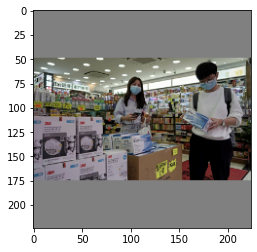

In [ ]:
fig,ax = plt.subplots(1)
ax.imshow(imd_data[1])
bboxes = tg[1][0][1][:,:,:,:4]
for bbox in tf.reshape(bboxes,(14*14*3,4)):
  rect = patches.Rectangle((bbox[0]-bbox[2] *0.5,bbox[1] + bbox[3]*0.5),bbox[2],bbox[3],linewidth=1,
                          edgecolor='r',facecolor="none")
  ax.add_patch(rect)
plt.show()

In [ ]:
model.compile()

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 224, 224, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
tg[0][0][0][0,0,0,:4]#[0,0,0,0,:4]

array([0., 0., 0., 0.], dtype=float32)

In [ ]:
bboxes = tg[0][1][0].shape#[:,:,:,:4]; bboxes.shape

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def predict_custom_img(path,score_thresh,iou_thresh):

  image = cv2.imread(path)
  input_size = cfg.TRAIN.INPUT_SIZE
  image = cv2.imread(path)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  image_size = image.shape[:2]
  image_data = image_preprocess(np.copy(image),[input_size,input_size])
  image_data = image_data[np.newaxis,...].astype(np.float32)

  pred_bbox = model.predict(image_data)
  for i in range(len(pred_bbox)):
    if tf.shape(pred_bbox[i])[-1]==21:
      pred_bbox[i] = tf.reshape(pred_bbox[i],(pred_bbox[i].shape[:-1]+(3,7)))

  pred_bbox = [tf.reshape(x,(-1,tf.shape(x)[-1])) for x in pred_bbox]
  pred_bbox = tf.concat(pred_bbox,axis=0)
  bboxes = postprocess_boxes(pred_bbox,image_size,input_size,score_thresh)
  bboxes = nms(bboxes,iou_thresh,method='nms')
  print(bboxes)
  image_det = draw_bbox(image,bboxes)
  # image_det = cv2.cvtColor(image_det,cv2.COLOR_RGB2BG
  plt.imshow(image_det)


In [ ]:
!wget https://d3t1qz3s2moybi.cloudfront.net/99d96849-42ec-4cdd-baf4-0385e63b387a.jpg

--2022-02-03 11:24:59--  https://d3t1qz3s2moybi.cloudfront.net/99d96849-42ec-4cdd-baf4-0385e63b387a.jpg
Resolving d3t1qz3s2moybi.cloudfront.net (d3t1qz3s2moybi.cloudfront.net)... 65.8.55.213, 65.8.55.32, 65.8.55.25, ...
Connecting to d3t1qz3s2moybi.cloudfront.net (d3t1qz3s2moybi.cloudfront.net)|65.8.55.213|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3274929 (3.1M) [binary/octet-stream]
Saving to: ‘99d96849-42ec-4cdd-baf4-0385e63b387a.jpg’

99d96849-42ec-4cdd- 100%[===================>]   3.12M  --.-KB/s    in 0.1s    

2022-02-03 11:25:00 (26.4 MB/s) - ‘99d96849-42ec-4cdd-baf4-0385e63b387a.jpg’ saved [3274929/3274929]



In [ ]:
predict_custom_img('/content/99d96849-42ec-4cdd-baf4-0385e63b387a.jpg',0.4,0.1)

ValueError: ignored

In [ ]:
len(pred_bbox)

6

In [ ]:
pred_bbox.shape

AttributeError: ignored

In [ ]:
pred_bbox = model.predict(image_data)

In [ ]:
lst = []
for x in pred_bbox:
  lst.append(tf.reshape(x,(-1,tf.shape(x)[-1])))

In [ ]:
for i,j in zip(pred_bbox,lst):
  print(i.shape)
  print(j.shape)

(2, 28, 28, 21)
(1568, 21)
(2, 28, 28, 3, 7)
(4704, 7)
(2, 14, 14, 21)
(392, 21)
(2, 14, 14, 3, 7)
(1176, 7)
(2, 7, 7, 21)
(98, 21)
(2, 7, 7, 3, 7)
(294, 7)


In [ ]:
a = tf.constant([[1,2,3],
                 [3,4,5]])

In [ ]:
tf.reshape(a,(-1,tf.shape(a)[-1]))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [3, 4, 5]], dtype=int32)>

In [ ]:
a = tf.random.uniform([2,21])
b = tf.random.uniform([2,3,7])

NameError: ignored

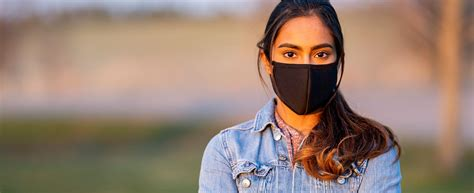

In [ ]:
from google.colab.patches import cv2_imshow
img = cv2.imread('person.jpg')
cv2_imshow(img)

In [ ]:
pred_bbox[0].shape[:-1]+(3,7)

(2, 28, 28, 3, 7)

In [ ]:
tf.reshape(pred_bbox[0],(2,28,28,3,7))

<tf.Tensor: shape=(2, 28, 28, 3, 7), dtype=float32, numpy=
array([[[[[ 5.17975576e-02,  9.68651175e-02, -3.60818595e-01, ...,
           -1.46687520e+00, -1.65266395e-01,  1.19972140e-01],
          [-2.54435856e-02,  3.09222136e-02, -3.72851372e-01, ...,
           -1.52766860e+00, -6.99480698e-02, -2.43635885e-02],
          [-9.86907631e-03,  9.42523330e-02, -1.26199558e-01, ...,
           -1.51988924e+00, -3.10925338e-02,  4.72413301e-02]],

         [[ 6.61238432e-02,  8.38398263e-02, -5.41972876e-01, ...,
           -1.45879078e+00, -2.37440377e-01,  1.59228638e-01],
          [-6.84317648e-02,  7.22213462e-02, -4.06065434e-01, ...,
           -1.52960360e+00, -9.44463089e-02,  5.31281456e-02],
          [ 2.66719833e-02,  1.06744677e-01, -1.25427052e-01, ...,
           -1.50098157e+00, -8.14411193e-02,  6.58444762e-02]],

         [[ 7.35507458e-02,  1.20585889e-01, -5.63196123e-01, ...,
           -1.47753346e+00, -2.60341644e-01,  1.57429844e-01],
          [-7.25775510e-02,

In [ ]:
model.save_weights('SavedModel/YOLOV3_model/checkpoint.ckpt')

In [ ]:
!wget https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.J0tYudYi9coR_SrEmxGNawHaE7%26pid%3DApi&f=1

--2022-02-16 08:51:19--  https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.J0tYudYi9coR_SrEmxGNawHaE7%26pid%3DApi
Resolving external-content.duckduckgo.com (external-content.duckduckgo.com)... 52.142.125.222
Connecting to external-content.duckduckgo.com (external-content.duckduckgo.com)|52.142.125.222|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘index.html?u=https:%2F%2Ftse1.mm.bing.net%2Fth?id=OIP.J0tYudYi9coR_SrEmxGNawHaE7&pid=Api’

index.html?u=https:     [ <=>                ]  21.59K  --.-KB/s    in 0s      

2022-02-16 08:51:19 (128 MB/s) - ‘index.html?u=https:%2F%2Ftse1.mm.bing.net%2Fth?id=OIP.J0tYudYi9coR_SrEmxGNawHaE7&pid=Api’ saved [22106]



In [ ]:
import importlib
importlib.reload(run_inference)

<module 'run_inference' from '/content/YOLOv3/run_inference.py'>

In [ ]:
pred_bbox = run_inference.infer()

In [ ]:
pred_bbox[1][0,0,0,:,:]

array([[ 3.9377322 ,  4.054508  , 11.4438925 , 12.683543  ,  0.24529573,
         0.5243601 ,  0.4793286 ],
       [ 4.012702  ,  4.105334  , 19.067495  , 25.204163  ,  0.25078154,
         0.5158151 ,  0.47390994],
       [ 4.1461387 ,  4.1300282 , 26.79563   , 26.904068  ,  0.26835495,
         0.47174403,  0.47060382]], dtype=float32)

In [ ]:
 pred_bbox = [tf.reshape(x, (-1, tf.shape(x)[-1])) for x in pred_bbox]

In [ ]:
pred_bbox_2 = [l for i,l in enumerate(pred_bbox) if i%2!=0]

In [ ]:
pred_bbox = tf.concat(pred_bbox_2,axis=0)

In [ ]:
import core.utils as utils

In [ ]:
importlib.reload(utils)

<module 'core.utils' from '/content/YOLOv3/core/utils.py'>

In [ ]:
image = cv2.imread('person.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_size = image.shape[:2]
image_data = utils.image_preporcess(np.copy(image), [416, 416])
image_data = image_data[np.newaxis, ...].astype(np.float32) # (1, width, height, 3)


In [ ]:
l = np.array([1,2,3,4,5,6,7,8,9,10])
weight = np.ones(len(l),dtype=np.float32)

In [ ]:
iou = l>7
weight[iou] = 0.0

In [ ]:
weight

array([1., 1., 1., 1., 1., 1., 1., 0., 0., 0.], dtype=float32)

In [ ]:
bboxes = utils.postprocess_boxes(pred_bbox,image_size,416,0.1)

In [ ]:
nms_bboxes = utils.nms(bboxes,0.9,method='nms')

In [ ]:
len(nms_bboxes)

6975

In [ ]:
import numpy as np

1.1920929e-07

In [ ]:
len(nms_bboxes)

6975

In [ ]:
nms_bboxes

[array([ 8.11315727, 18.51817131, 36.81087875, 50.06622696,  0.17822246,
         0.        ]),
 array([2.17683487e+02, 1.63897252e+00, 2.47342422e+02, 3.09157085e+01,
        1.20341219e-01, 1.00000000e+00])]

In [ ]:
image_with_detect = utils.draw_bbox(image,nms_bboxes)

In [ ]:
import matplotlib.pyplot as plt

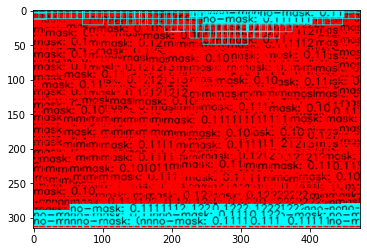

In [ ]:
plt.imshow(image_with_detect)

In [ ]:
!python run_inference.py --path=person.png

2022-02-16 10:02:42.590128: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2022-02-16 10:02:50.817258: W tensorflow/core/common_runtime/bfc_allocator.cc:343] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batch sizes to observe the performance impact. Set TF_ENABLE_GPU_GARBAGE_COLLECTION=false if you'd like to disable this feature.
image_size =  (315, 474)


In [ ]:
importlib.reload(run_inference)

<module 'run_inference' from '/content/YOLOv3/run_inference.py'>

In [ ]:
img = run_inference.infer(sc_thresh=0.2)

image_size =  (315, 474)


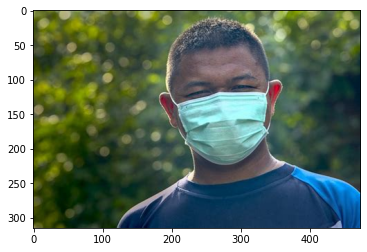

In [ ]:
plt.imshow(img)

In [ ]:
%cd YOLOv3

/content/YOLOv3


In [ ]:
!python train.py

2022-02-16 07:52:31.422479: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
=> STEP    1   lr: 0.001000   giou_loss: 10.64   conf_loss: 1888.96   prob_loss: 13.59   total_loss: 1913.20
=> STEP    2   lr: 0.000000   giou_loss: 11.63   conf_loss: 2033.16   prob_loss: 15.50   total_loss: 2060.29
=> STEP    3   lr: 0.000000   giou_loss: 8.67   conf_loss: 2039.21   prob_loss: 12.09   total_loss: 2059.97
=> STEP    4   lr: 0.000000   giou_loss: 3.82   conf_loss: 2052.72   prob_loss: 4.95   total_loss: 2061.49
=> STEP    5   lr: 0.000000   giou_loss: 6.93   conf_loss: 1942.75   prob_loss: 9.70   total_loss: 1959.38
=> STEP    6   lr: 0.000000   giou_loss: 16.53   conf_loss: 2027.66   prob_loss: 20.88   total_loss: 2065.07
=> STEP    7   lr: 0.000000   giou_loss: 5.87   conf_loss: 2045.41   prob_loss: 6.07   total_loss: 2057.35
=> STEP    8   lr: 0.00000